<a href="https://colab.research.google.com/github/abhirampitla-13/2311cs020528/blob/main/logistic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
from google.colab import files
uploaded = files.upload()
file_name = list(uploaded.keys())[0]
df = pd.read_csv(file_name)

Saving claimants.csv to claimants.csv


In [2]:
df

,CASENUM,ATTORNEY,CLMSEX,CLMINSUR,SEATBELT,CLMAGE,LOSS
0,5,0,0.0,1.0,0.0,50.0,34.940
1,3,1,1.0,0.0,0.0,18.0,0.891
2,66,1,0.0,1.0,0.0,5.0,0.330
3,70,0,0.0,1.0,1.0,31.0,0.037
4,96,1,0.0,1.0,0.0,30.0,0.038
...,...,...,...,...,...,...,...
1335,34100,1,0.0,1.0,0.0,NaN,0.576
1336,34110,0,1.0,1.0,0.0,46.0,3.705
1337,34113,1,1.0,1.0,0.0,39.0,0.099
1338,34145,0,1.0,0.0,0.0,8.0,3.177


In [6]:
correlation =df['ATTORNEY'].corr(df['LOSS'])
correlation

-0.2197150271023389

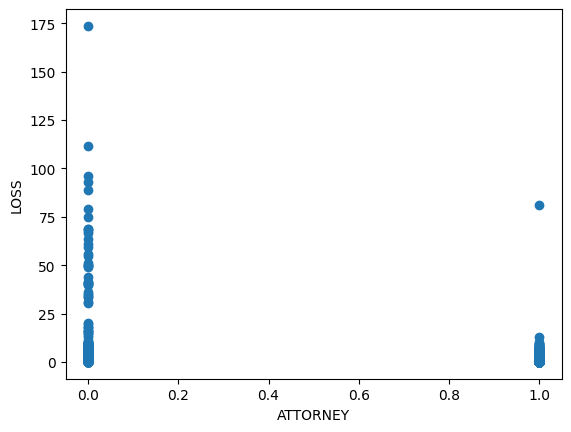

In [7]:
import matplotlib.pyplot as plt
plt.scatter(df['ATTORNEY'], df['LOSS'])
plt.xlabel('ATTORNEY')
plt.ylabel('LOSS')
plt.show()

In [8]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from pickle import dump
from pickle import load

claimants = pd.read_csv("claimants.csv")
claimants.drop(["CASENUM"], inplace=True, axis=1)
claimants = claimants.dropna()

x = claimants.iloc[:,[1,2,3,4,5]]
y = claimants.iloc[:,0]
print(x)
print(y)
model = LogisticRegression()
model.fit(x,y)

dump(model, open('Logistic_Model.sav', 'wb'))
lodaded_model = load(open('Logistic_Model.sav', 'rb'))
result = lodaded_model.score(x,y)
print(result)

      CLMSEX  CLMINSUR  SEATBELT  CLMAGE    LOSS
0        0.0       1.0       0.0    50.0  34.940
1        1.0       0.0       0.0    18.0   0.891
2        0.0       1.0       0.0     5.0   0.330
3        0.0       1.0       1.0    31.0   0.037
4        0.0       1.0       0.0    30.0   0.038
...      ...       ...       ...     ...     ...
1334     1.0       1.0       0.0    16.0   0.060
1336     1.0       1.0       0.0    46.0   3.705
1337     1.0       1.0       0.0    39.0   0.099
1338     1.0       0.0       0.0     8.0   3.177
1339     1.0       1.0       0.0    30.0   0.688

[1096 rows x 5 columns]
0       0
1       1
2       1
3       0
4       1
       ..
1334    1
1336    0
1337    1
1338    0
1339    1
Name: ATTORNEY, Length: 1096, dtype: int64
0.708029197080292
